In [3]:
from data_tools import parse_boxes_from_json
from tiling import crop_ground_truths
from targets import generate
from visualize import render_boxes
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from tkinter.filedialog import askopenfilename

ModuleNotFoundError: No module named 'geopandas'

In [2]:
txt_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/txt/D0041-5370006.txt'
json_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/json/D0041-5370006.json'
im_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/images/D0041-5370006.tiff'

In [3]:
#json_dir = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/json'
#json_path = askopenfilename(initialdir=json_dir)
points, polygons, labels = parse_boxes_from_json(json_path)

In [4]:
def crop_ground_truths(x, y, tile_size, gt_coords, gt_polys):
    """
    Takes a tile location+dimensions and finds all ground truths that
    intersect that tile

    param x: the x-coord of the top-left vertex of the tile
    param y: the y-coord of the top-left vertex of the tile
    param tile_size: the length of the tile side
    param gt_coords: a list of the ground truths in the form of the vertices
    param gt_polys: a list of the ground truths in the form of Shapely polygons
    returns: a list of shifted ground truth coordinates that intersect the tile
    """
    tile = Polygon( [ (x, y),
                      (x, y+tile_size),
                      (x+tile_size, y+tile_size),
                      (x+tile_size, y) ] )
    
    global intersects_tile
    intersects_tile = [tile.intersects(gt) for gt in gt_polys]
    intersects_tile = np.asarray( intersects_tile )
        
    keep_indices = np.argwhere( intersects_tile )

    # Hack because squeezing a 1x1 matrix will return a scalar,
    # which will break the code
    if (len(keep_indices) == 1):
        keep_indices = keep_indices[0]
    else:
        keep_indices = np.squeeze(keep_indices)

    keep_gt = np.asarray( gt_coords[:,:,keep_indices] )
    keep_gt[:,0,:] = keep_gt[:,0,:] - np.asarray([x])
    keep_gt[:,1,:] = keep_gt[:,1,:] - np.asarray([y])
    # TODO: Sort ground truths by area for marking shrunk away don't
    # care regions correctly when generating targets.

    return keep_gt

In [5]:
keep_gt = crop_ground_truths(1000, 1000, 512, points, polygons)

In [6]:
keep_gt.shape

(4, 2, 14)

In [7]:
idx = np.argwhere(intersects_tile)

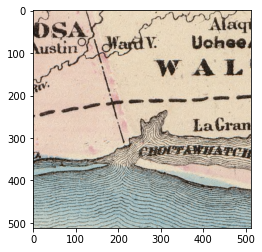

In [8]:
im = plt.imread(im_path)[1000:1512, 1000:1512, :]
plt.imshow(im)
plt.show()

In [10]:
a = np.transpose(keep_gt, (2, 0, 1))
b = a.tolist()

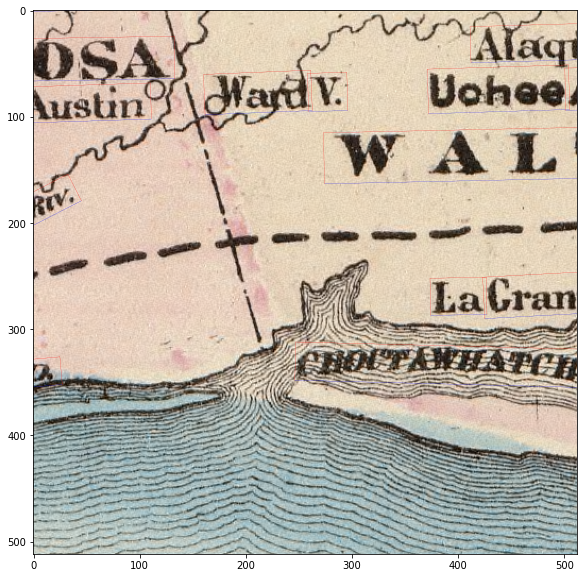

In [11]:
render_boxes(im, b)

In [ ]:
[b[0]]

In [ ]:
keep_gt[:, :, 0]